Here's some **data augmentation methods for audio**. Some of them are inspired from [TF speech recognition tutorial](https://github.com/tensorflow/tensorflow/tree/master/tensorflow/examples/speech_commands)

I highly recommend everyone new to this competition should take a look at the official baseline method showed above because it can produce 77% acc in public LB, which is higher than 60%+ of the teams (include mine) for now...

In [4]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import librosa
import matplotlib.pyplot as plt
import os
#import cv2
import IPython.display as ipd

EPS = 1e-8

In [5]:
def get_spectrogram(wav):
    D = librosa.stft(wav, n_fft=480, hop_length=160,
                     win_length=480, window='hamming')
    spect, phase = librosa.magphase(D)
    return spect

Let's take an example audio first

In [6]:
file_path = './data/Weapons_Firing Range_Gun_Rifle_Large Hunting Rifle_Single Shot_Short Tail_HutchSFX.wav'
wav, sr = librosa.load(file_path, sr=None)
print(wav.shape, wav.max(), wav.min())

(31104,) 0.5897064 -0.57347107


In [7]:
ipd.Audio(wav, rate=sr)

spectrogram shape: (241, 195)


<ipython-input-8-cb5b5e6f50b7>:1: RuntimeWarning: divide by zero encountered in log
  log_spect = np.log(get_spectrogram(wav))


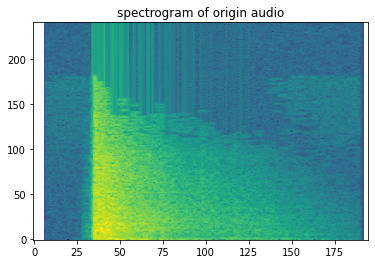

In [8]:
log_spect = np.log(get_spectrogram(wav))
print('spectrogram shape:', log_spect.shape)
plt.imshow(log_spect, aspect='auto', origin='lower',)
plt.title('spectrogram of origin audio')
plt.show()

## 1. Time shifting

slightly shift the starting point of the audio, then pad it to original length.

In [9]:
start_ = int(np.random.uniform(-4800,4800))
print('time shift: ',start_)
if start_ >= 0:
    wav_time_shift = np.r_[wav[start_:], np.random.uniform(-0.001,0.001, start_)]
else:
    wav_time_shift = np.r_[np.random.uniform(-0.001,0.001, -start_), wav[:start_]]
ipd.Audio(wav_time_shift, rate=sr)

time shift:  -223


spectrogram shape: (241, 195)


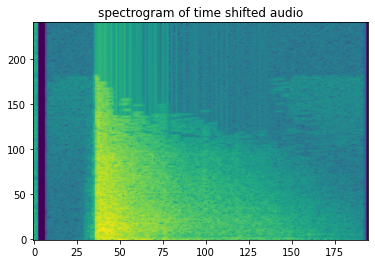

In [10]:
log_spect = np.log(get_spectrogram(wav_time_shift)+EPS)
print('spectrogram shape:', log_spect.shape)
plt.imshow(log_spect, aspect='auto', origin='lower',)
plt.title('spectrogram of time shifted audio')
plt.show()

## 2. Speed tuning
slightly change the speed of the audio, then pad or slice it.

In [11]:
speed_rate = np.random.uniform(0.7,1.3)
wav_speed_tune = cv2.resize(wav, (1, int(len(wav) * speed_rate))).squeeze()
print('speed rate: %.3f' % speed_rate, '(lower is faster)')
if len(wav_speed_tune) < 16000:
    pad_len = 16000 - len(wav_speed_tune)
    wav_speed_tune = np.r_[np.random.uniform(-0.001,0.001,int(pad_len/2)),
                           wav_speed_tune,
                           np.random.uniform(-0.001,0.001,int(np.ceil(pad_len/2)))]
else: 
    cut_len = len(wav_speed_tune) - 16000
    wav_speed_tune = wav_speed_tune[int(cut_len/2):int(cut_len/2)+16000]
print('wav length: ', wav_speed_tune.shape[0])
ipd.Audio(wav_speed_tune, rate=sr)

NameError: name 'cv2' is not defined

In [ ]:
log_spect = np.log(get_spectrogram(wav_speed_tune)+EPS)
print('spectrogram shape:', log_spect.shape)
plt.imshow(log_spect, aspect='auto', origin='lower',)
plt.title('spectrogram of speed tuned audio')
plt.show()

## 3 & 4. Mix background noise & volume tuning
randomly choose a slice of background noise then mix it with the speech audio, along with randomly volume tuning

In [ ]:
bg_files = os.listdir('../input/train/audio/_background_noise_/')
bg_files.remove('README.md')
chosen_bg_file = bg_files[np.random.randint(6)]
bg, sr = librosa.load('../input/train/audio/_background_noise_/'+chosen_bg_file, sr=None)
print(chosen_bg_file,'|', bg.shape[0], bg.max(), bg.min())
ipd.Audio(bg, rate=sr) # !! be prepared when playing the noise, bacause it's so ANNOYING !!

In [ ]:
start_ = np.random.randint(bg.shape[0]-16000)
bg_slice = bg[start_ : start_+16000]
wav_with_bg = wav * np.random.uniform(0.8, 1.2) + \
              bg_slice * np.random.uniform(0, 0.1)
ipd.Audio(wav_with_bg, rate=sr) 

In [ ]:
log_spect = np.log(get_spectrogram(wav_with_bg)+EPS)
print('spectrogram shape:', log_spect.shape)
plt.imshow(log_spect, aspect='auto', origin='lower',)
plt.title('spectrogram of audio with background noise')
plt.show()

If you find this helpful, please upvote me, thank you!